In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision as tv
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [21]:
_include_('curriculum_vqa')
_include_('commons')

from cvqa import datasets, model, trainer
from commons import debug

seed = 1

np.random.seed(seed)
torch.manual_seed(seed);

root = f'{DEV_HOME}/curriculum_vqa/data-bin/basic_curriculum'

train_dataset = datasets.BasicCurriculum(root, 'train')
train_dataset

Samples: 100 (N=8)
Labels:{'blue': 0, 'circle': 1, 'grey': 2, 'red': 3, 'triangle': 4}
Vocab Tokens:16

In [23]:
train_dataset[0]['img'].shape

torch.Size([3, 224, 224])

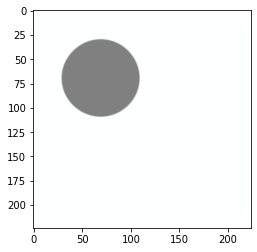

In [31]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
imshow(train_dataset[8]['img'])

In [32]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
img_batch = next(iter(dataloader))['img']
img_batch.shape

torch.Size([4, 3, 224, 224])

In [34]:
viz_model = models.resnet18(pretrained=True)
viz_model(img_batch).shape

torch.Size([4, 1000])

In [35]:
num_ftrs = viz_model.fc.in_features
viz_model.fc = nn.Linear(num_ftrs, len(train_dataset.class_to_idx))

In [36]:
viz_model(img_batch).shape

torch.Size([4, 5])